In [38]:
# # Modules
# import os

# # Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

# # Use numpy to convert to arrays
import numpy as np
# from numpy import log

# from scipy.stats import sem

# # Using Skicit-learn to split data into training and testing sets
# from sklearn.model_selection import train_test_split

# # Import the model we are using
# from sklearn.datasets import make_regression
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score

# # Import tools needed for visualization
# from sklearn.tree import export_graphviz
# import pydot

from statsmodels.tsa.arima_model import ARIMA
# from pmdarima.arima import auto_arima
import pmdarima as pm

## Stuff we want at top-level
# from .arima import auto_arima, ARIMA, AutoARIMA
# from .utils import acf, autocorr_plot, c, pacf, plot_acf, plot_pacf
# from pmdarima.arima._arima import C_Approx

# from statsmodels.tsa.arima_model import ARIMA
# from statsmodels.tsa.stattools import adfuller

# from .approx import *
# from .arima import *
# from .auto import *

# import cython

# numpy 1.15.4 to 1.17.0
# scipy 1.2.0 
# scikit-learn 0.20.1 
# pandas 0.23.4 
# statsmodels 0.10.1 
# Cython 0.29.13
# pmdarima 1.2.1



In [39]:
# Load the "US_emissions_by_gas_1990-2017_data.xlsx" Dataset

US_gas_data = pd.read_excel("data/US_emissions_by_gas_1990_2017_data.xlsx")
US_gas_data.head()

,Gas,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Carbon dioxide,5121.179440,5071.563914,5174.670601,5281.386608,5375.033803,5436.697986,5625.041885,5701.920919,5749.893056,...,5928.256329,5493.547908,5700.108337,5572.584775,5371.777170,5522.908365,5572.106312,5422.965677,5306.662457,5270.748525
1,Methane,779.845550,784.384856,783.176602,770.308404,775.160651,767.845344,759.491158,744.932926,729.618317,...,702.303384,692.676127,697.450404,675.544902,665.372404,663.042641,662.064221,661.395920,654.897884,656.316679
2,Nitrous oxide,370.307694,368.961757,371.786442,385.347234,376.511527,388.502830,395.545749,386.608376,402.495771,...,374.546556,373.259958,382.929378,375.073815,348.876128,365.354277,362.742736,374.108885,364.485759,360.515661
3,Fluorinated gases,99.667859,90.704668,95.300712,95.027350,98.129806,117.021137,127.620262,134.999750,150.518866,...,155.494544,149.885151,158.103563,164.215536,159.943630,158.912892,163.082364,165.304997,166.221325,169.137327
4,Total,6371.000543,6315.615194,6424.934357,6532.069596,6624.835787,6710.067297,6907.699054,6968.461971,7032.526010,...,7160.600813,6709.369145,6938.591681,6787.419028,6545.969331,6710.218175,6759.995633,6623.775479,6492.267425,6456.718193


In [40]:
cond1 = US_gas_data['Gas'] == 'Methane'
US_gas_data[cond1].values[0,1:]

model = pm.auto_arima(US_gas_data[cond1].values[0,1:], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Fit ARIMA: order=(1, 2, 1); AIC=188.896, BIC=193.928, Fit time=0.173 seconds
Fit ARIMA: order=(0, 2, 0); AIC=197.247, BIC=199.763, Fit time=0.007 seconds
Fit ARIMA: order=(1, 2, 0); AIC=187.478, BIC=191.253, Fit time=0.047 seconds
Fit ARIMA: order=(0, 2, 1); AIC=186.913, BIC=190.687, Fit time=0.122 seconds
Fit ARIMA: order=(0, 2, 2); AIC=189.571, BIC=194.604, Fit time=0.090 seconds
Fit ARIMA: order=(1, 2, 2); AIC=190.878, BIC=197.168, Fit time=0.115 seconds
Total fit time: 0.592 seconds
                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   26
Model:                 ARIMA(0, 2, 1)   Log Likelihood                 -90.456
Method:                       css-mle   S.D. of innovations              7.366
Date:                Thu, 01 Aug 2019   AIC                            186.913
Time:                        19:31:05   BIC                            190.687
Sample:                           

In [41]:
cond1 = US_gas_data['Gas'] == 'Methane'
US_gas_data[cond1].values[0,1:]



array([779.84555008836, 784.384855931889, 783.176601954632,
       770.308404131865, 775.160650514985, 767.845344228082,
       759.491158168007, 744.932926188647, 729.618316619847,
       717.451034920557, 709.304022944265, 703.915003543237,
       694.953631730922, 695.433020498632, 687.548988671194,
       691.430647689735, 691.97779763893, 694.607583655884,
       702.303384076452, 692.676127284877, 697.450403532237,
       675.544901685482, 665.372403523609, 663.042641152867,
       662.064220621265, 661.395919895165, 654.897883631682,
       656.316679086237], dtype=object)

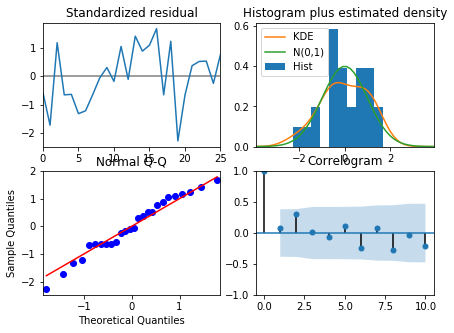

In [42]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

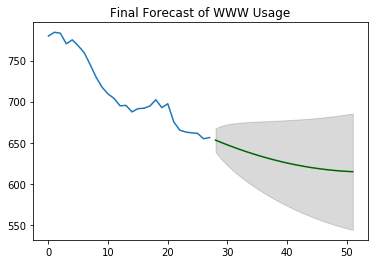

In [44]:
# Forecast
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(US_gas_data[cond1].values[0,1:]), len(US_gas_data[cond1].values[0,1:])+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(US_gas_data[cond1].values[0,1:])
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index,
                lower_series,
                upper_series,
                color='k', alpha=.15)

plt.title("Final Forecast of WWW Usage")
plt.show()